In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
df = pd.read_csv('Airlinewise Monthly International Air Traffic To And From The Indian Territory.csv')

# Setting options to display all rows and columns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

df.head()

,YEAR,MONTH,QUARTER,AIRLINE NAME,CARRIER TYPE,PASSENGERS TO INDIA,PASSENGERS FROM INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA
0,2015,JAN,Q1,AIR INDIA,DOMESTIC,258876.0,274220,3320.626,4186.302
1,2015,JAN,Q1,AIR INDIA EXPRESS,DOMESTIC,95581.0,116600,0.000,0.000
2,2015,JAN,Q1,INDIGO,DOMESTIC,68112.0,74212,320.000,1812.000
3,2015,JAN,Q1,JET AIRWAYS,DOMESTIC,320853.0,332116,4173.874,5383.515
4,2015,JAN,Q1,SPICEJET,DOMESTIC,37882.0,42468,0.000,115.680


In [34]:
df.dtypes

YEAR                       int64
MONTH                     object
QUARTER                   object
AIRLINE NAME              object
CARRIER TYPE              object
PASSENGERS TO INDIA      float64
PASSENGERS FROM INDIA      int64
FREIGHT TO INDIA         float64
FREIGHT FROM INDIA       float64
dtype: object

In [35]:
df.describe()
# # inplace=True will overwrite the data frame after dropping Id column
# df.drop(['Id'], axis=1, inplace=True)


,YEAR,PASSENGERS TO INDIA,PASSENGERS FROM INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA
count,2334.000000,2333.000000,2334.000000,2334.000000,2334.000000
mean,2015.699229,24476.482212,25452.484576,550.932764,865.262860
std,0.674328,51146.213682,52474.422940,1281.898272,2151.224952
min,2015.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,1488.000000,1629.250000,0.300000,8.525000
50%,2016.000000,4960.000000,5264.500000,53.950000,154.325000
75%,2016.000000,23290.000000,23418.500000,311.214750,770.028000
max,2017.000000,402497.000000,400155.000000,14916.471000,48640.298000


In [36]:
# df[df['AIRLINE NAME'] == 'AEROFLOT']

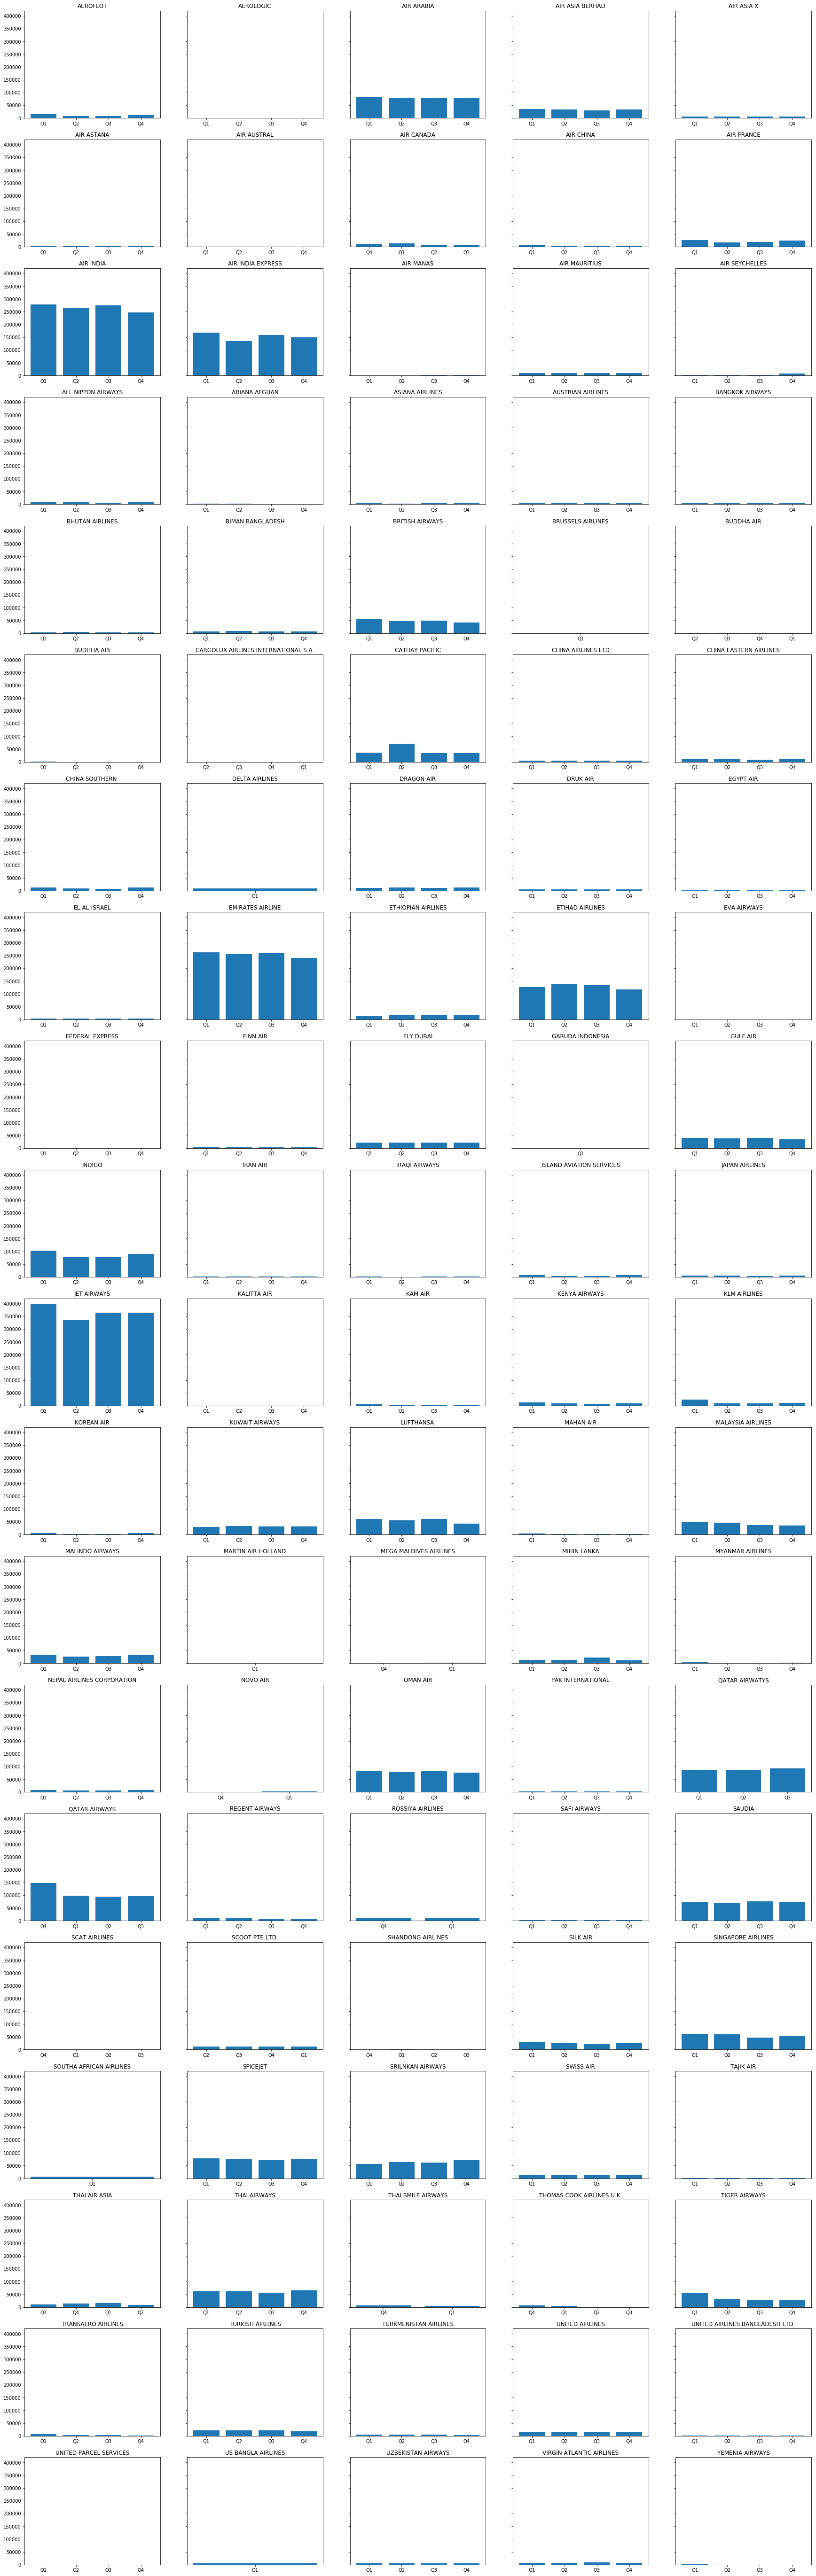

In [37]:
fig, ax = plt.subplots(20, 5, figsize=(30, 100), sharey=True)
ax = ax.reshape(-1)
i = 0
for airline, airline_df in df.groupby(['AIRLINE NAME']):
    ax[i].bar(x=airline_df['QUARTER'], height=airline_df['PASSENGERS FROM INDIA'])
    ax[i].set_title(airline)
    i += 1       

In [38]:
df.groupby(['AIRLINE NAME','YEAR','MONTH']).size().reset_index().shape

(2334, 4)

In [39]:
# len(df.groupby(['AIRLINE NAME','YEAR','MONTH']).groups)

In [40]:
# grp_data = grp_data.iloc[0:100,:]
# grp_data

In [41]:
import seaborn as sns

In [42]:
df.head()

,YEAR,MONTH,QUARTER,AIRLINE NAME,CARRIER TYPE,PASSENGERS TO INDIA,PASSENGERS FROM INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA
0,2015,JAN,Q1,AIR INDIA,DOMESTIC,258876.0,274220,3320.626,4186.302
1,2015,JAN,Q1,AIR INDIA EXPRESS,DOMESTIC,95581.0,116600,0.000,0.000
2,2015,JAN,Q1,INDIGO,DOMESTIC,68112.0,74212,320.000,1812.000
3,2015,JAN,Q1,JET AIRWAYS,DOMESTIC,320853.0,332116,4173.874,5383.515
4,2015,JAN,Q1,SPICEJET,DOMESTIC,37882.0,42468,0.000,115.680


In [43]:
# df = df.iloc[:100,:]

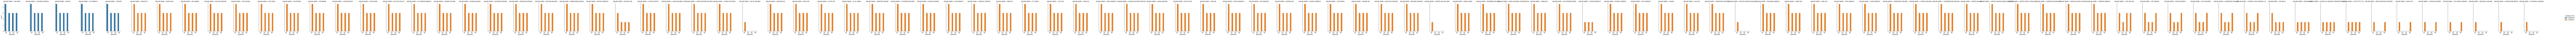

In [47]:
ax = sns.catplot(x="QUARTER", hue="CARRIER TYPE", col="AIRLINE NAME",
              data=df, kind="count",height=4, aspect=.7);
   

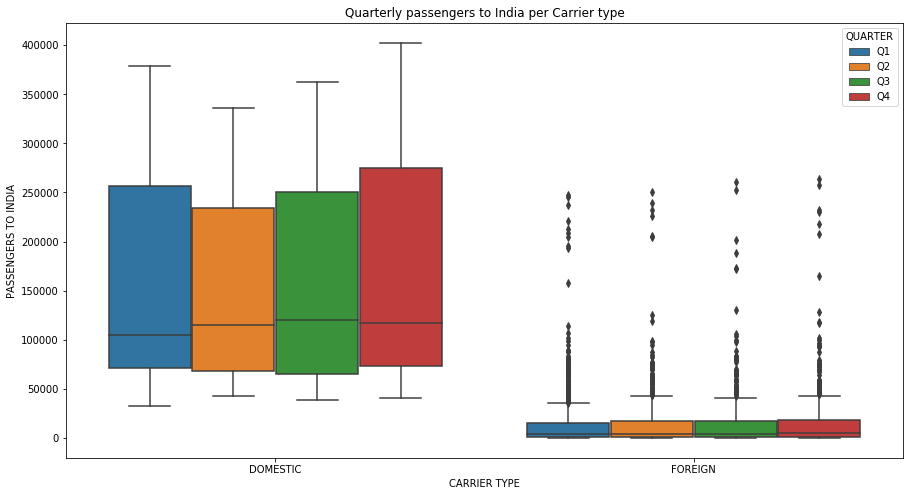

In [67]:
# Creating a box plot  
fig, ax = plt.subplots(figsize=(15, 8))  
sns.boxplot(x='CARRIER TYPE', y='PASSENGERS TO INDIA', hue='QUARTER', data=df, ax=ax)  
ax.set_title('Quarterly passengers to India per Carrier type')  
plt.show() 

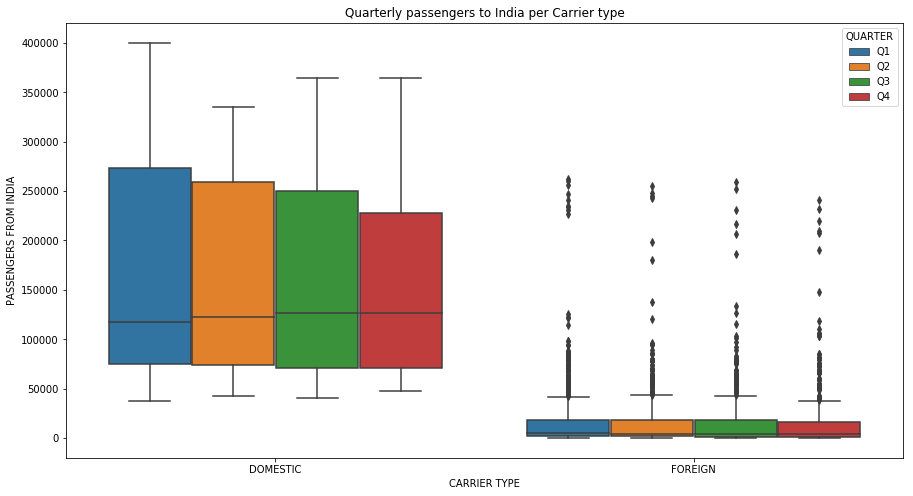

In [68]:
# Creating a box plot  
fig, ax = plt.subplots(figsize=(15, 8))  
sns.boxplot(x='CARRIER TYPE', y='PASSENGERS FROM INDIA', hue='QUARTER', data=df, ax=ax)  
ax.set_title('Quarterly passengers to India per Carrier type')  
plt.show() 

# Yearly travel statistics

In [52]:
df.YEAR.value_counts()

2016    1062
2015     987
2017     285
Name: YEAR, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


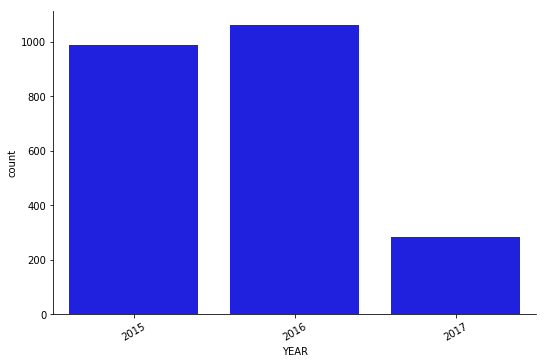

In [50]:
import seaborn as sns
g = sns.factorplot(x = "YEAR",data=df, aspect=1.5, kind="count", color="b")
g.set_xticklabels(rotation=30)

# Quarter wise domestic travel statistics - to and from India(Total traffic)

In [69]:
# tuple(df.loc[(df['AIRLINE NAME']=='AIR INDIA') & (df['QUARTER']=='Q1'),['PASSENGERS TO INDIA', 'PASSENGERS FROM INDIA']].sum())

In [ ]:
# grp_data = grp_data.iloc[0:100,:]
# grp_data

In [53]:
def myfunc(x):
    return x.loc[x['CARRIER TYPE']=='DOMESTIC', ['PASSENGERS TO INDIA', 'PASSENGERS FROM INDIA']].sum()

grp_data = df.groupby(['AIRLINE NAME','QUARTER']).apply(myfunc)
grp_data['Total_Traffic'] = grp_data['PASSENGERS TO INDIA'] + grp_data['PASSENGERS FROM INDIA']
# plt.scatter(x = 'QUARTER',y = 'Total_Traffic',data = grp_data)
grp_data = grp_data.reset_index()
grp_data = pd.DataFrame(grp_data)
grp_data

,AIRLINE NAME,QUARTER,PASSENGERS TO INDIA,PASSENGERS FROM INDIA,Total_Traffic
0,AEROFLOT,Q1,0.0,0.0,0.0
1,AEROFLOT,Q2,0.0,0.0,0.0
2,AEROFLOT,Q3,0.0,0.0,0.0
3,AEROFLOT,Q4,0.0,0.0,0.0
4,AEROLOGIC,Q1,0.0,0.0,0.0
5,AEROLOGIC,Q2,0.0,0.0,0.0
6,AEROLOGIC,Q3,0.0,0.0,0.0
7,AEROLOGIC,Q4,0.0,0.0,0.0
8,AIR ARABIA,Q1,0.0,0.0,0.0
9,AIR ARABIA,Q2,0.0,0.0,0.0


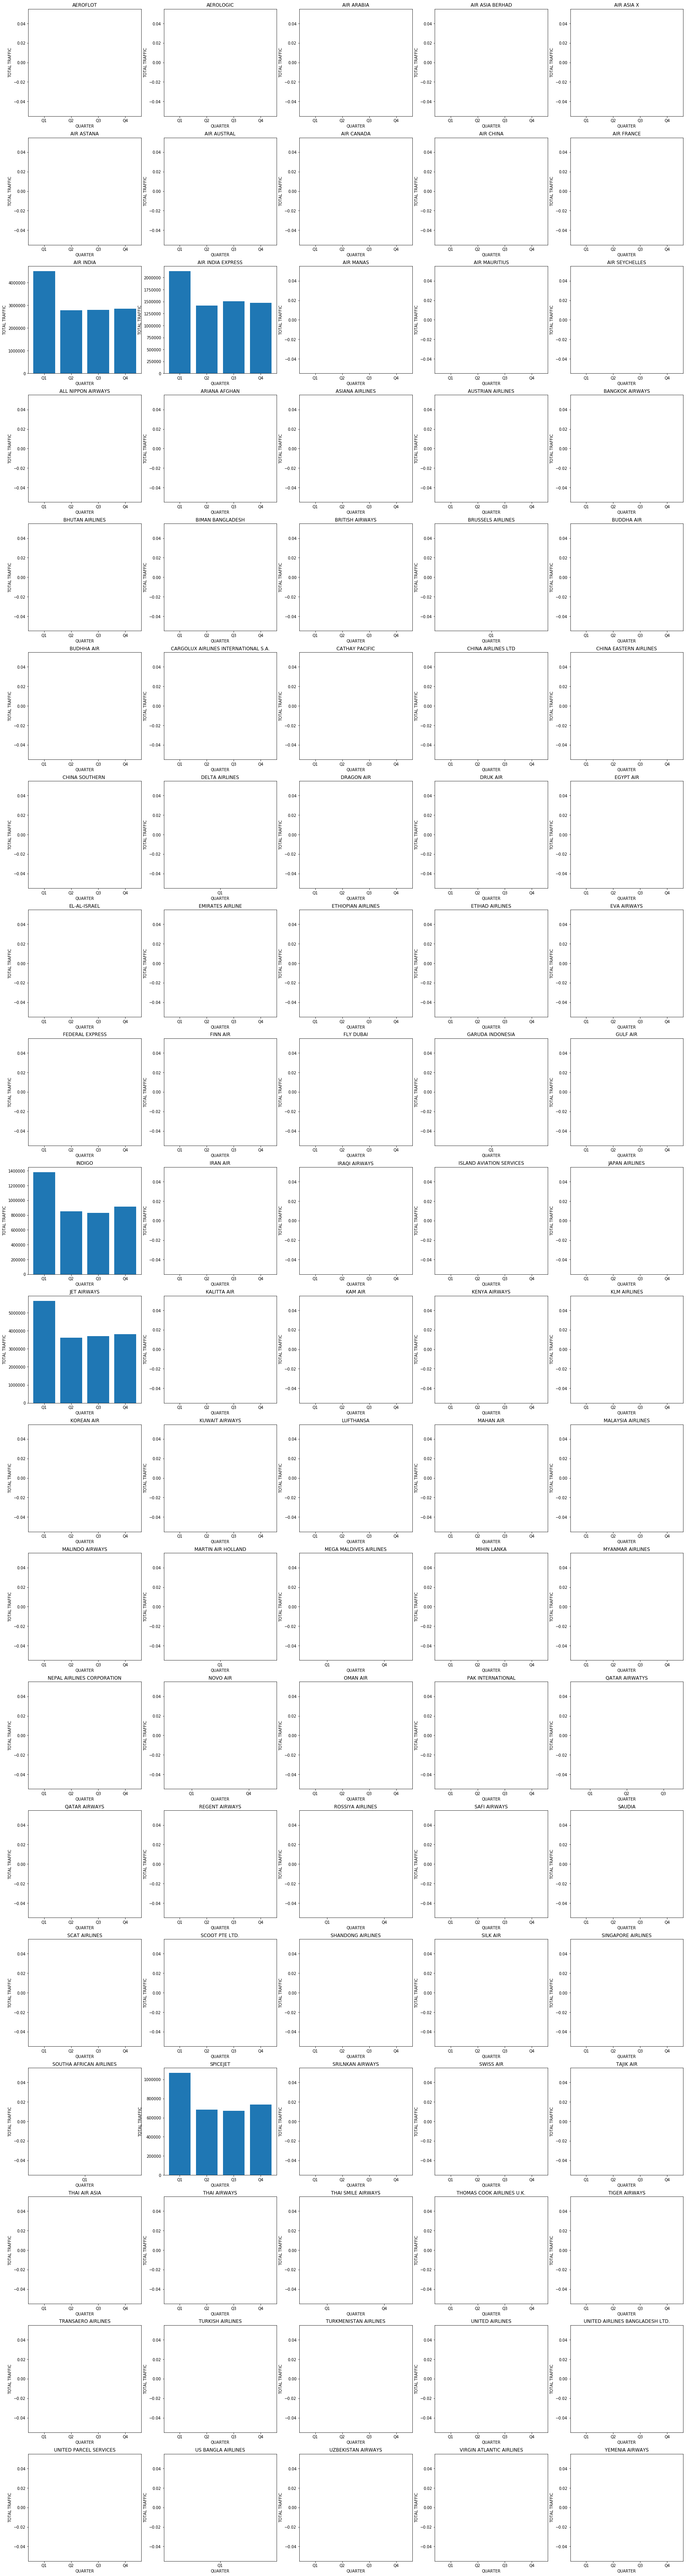

In [49]:
fig, ax = plt.subplots(20, 5, figsize=(30, 120))
ax=ax.reshape(-1)
i=0
for airline in grp_data['AIRLINE NAME'].unique():
    dff = grp_data.loc[grp_data['AIRLINE NAME'] == airline]
    ax[i].bar(x= dff['QUARTER'], height = dff['Total_Traffic'])
    ax[i].set_title(airline)
    ax[i].set_xlabel('QUARTER')
    ax[i].set_ylabel('TOTAL TRAFFIC')
    i += 1
    
    

# Quarter wise foreign travel statistics - to and from India(Total traffic)

In [ ]:
def myfunc(x):
    return x.loc[x['CARRIER TYPE']=='FOREIGN', ['PASSENGERS TO INDIA', 'PASSENGERS FROM INDIA']].sum()

grp_data = df.groupby(['AIRLINE NAME','QUARTER']).apply(myfunc)
grp_data['Total_Traffic'] = grp_data['PASSENGERS TO INDIA'] + grp_data['PASSENGERS FROM INDIA']
# plt.scatter(x = 'QUARTER',y = 'Total_Traffic',data = grp_data)
grp_data = grp_data.reset_index()
grp_data = pd.DataFrame(grp_data)
grp_data

In [ ]:
fig, ax = plt.subplots(20, 5, figsize=(30, 120))
ax=ax.reshape(-1)
i=0
for airline in grp_data['AIRLINE NAME'].unique():
    dff = grp_data.loc[grp_data['AIRLINE NAME'] == airline]
    ax[i].bar(x= dff['QUARTER'], height = dff['Total_Traffic'])
    ax[i].set_title(airline)
    ax[i].set_xlabel('QUARTER')
    ax[i].set_ylabel('TOTAL TRAFFIC')
    i += 1
    

In [ ]:
fig, ax = plt.subplots(500, 5, figsize=(30, 100), sharey=True)
ax = ax.reshape(-1)
i = 0
for airline, airline_df in df.groupby(['AIRLINE NAME','YEAR','MONTH']):
    ax[i].bar(x=airline_df['MONTH'], height=airline_df['PASSENGERS FROM INDIA'])
    ax[i].set_title(airline)
    i += 1  

In [ ]:
#     gather(quarter_wise_domestic,key=Category,Total,3:4) %>%
#     ggplot(aes(x=QUARTER,y=Total,fill=Category)) +
#     geom_bar(stat="identity",position="dodge") +
#     facet_wrap(~YEAR) +
#     scale_y_continuous(labels = comma) +
#     labs(title="Quarter Wise Travellers Domestic Flights",x="Quarter",y="Passengers") 
  
#   quarter_wise_foreign <-airline %>%filter(CARRIER.TYPE=="FOREIGN") %>%
#     group_by(YEAR,QUARTER) %>%
#     summarise(Passengers_ToInd=sum(PASSENGERS.TO.INDIA),Passengers_FromInd=sum(PASSENGERS.FROM.INDIA)) 
  
  
#   gather(quarter_wise_foreign,key=Category,Total,3:4) %>%
#     ggplot(aes(x=QUARTER,y=Total,fill=Category)) +
#     geom_bar(stat="identity",position=position_dodge()) +
#     facet_wrap(~YEAR) +
#     scale_y_continuous(labels = comma) +
#     labs(title="Quarter Wise Travellers -Foreign Flights",x="Quarter",y="Passengers") 